# Importing Data

In [2]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## Importing Libraries

In [6]:
path = r'C:\Users\smerg\esport_earning_2018-2023'

merged = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'EsportsData.cvs'))
merged_cleaned = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'EsportsDataCleaned.cvs'))

C:\Users\smerg\AppData\Local\Temp\ipykernel_9324\3265663920.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


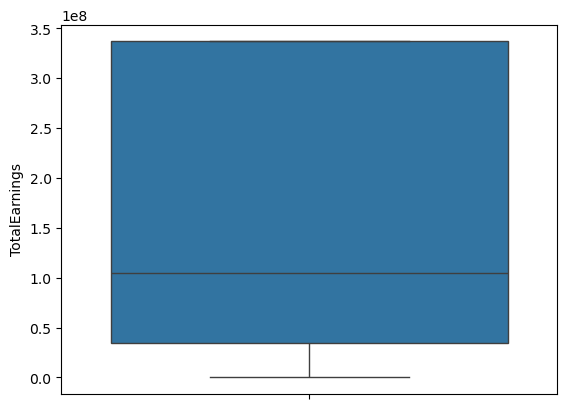

In [7]:
# Load your data (example with merged_all_fixed_cleaned from earlier)
# Replace this with the actual path to your dataset
data = merged_cleaned[['TotalPlayers', 'TotalEarnings']]

# Check for missing values
data.dropna(inplace=True)

# Check for outliers (optional)
sns.boxplot(data['TotalEarnings'])
plt.show()


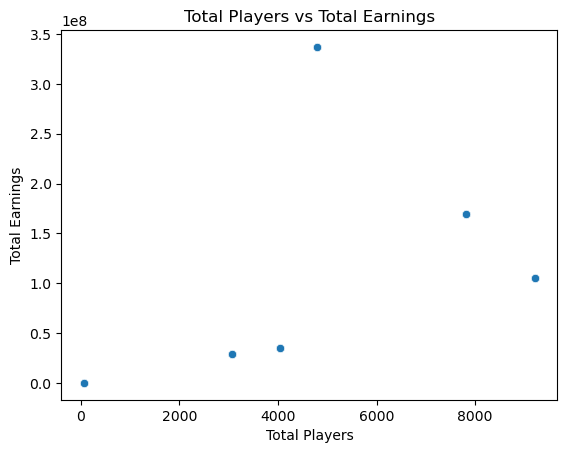

In [8]:
# Scatter plot to explore the relationship between Total Players and Total Earnings
sns.scatterplot(x='TotalPlayers', y='TotalEarnings', data=data)
plt.title('Total Players vs Total Earnings')
plt.xlabel('Total Players')
plt.ylabel('Total Earnings')
plt.show()


Hypothesis: There is a positive linear relationship between the number of players (X) and the total earnings (y) in esports games. As the number of players increases, the earnings also increase.

In [9]:
# Reshape the variables into NumPy arrays
X = data['TotalPlayers'].values.reshape(-1, 1)  # Independent variable (TotalPlayers)
y = data['TotalEarnings'].values.reshape(-1, 1)  # Dependent variable (TotalEarnings)


In [10]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the values on the test set
y_pred = model.predict(X_test)


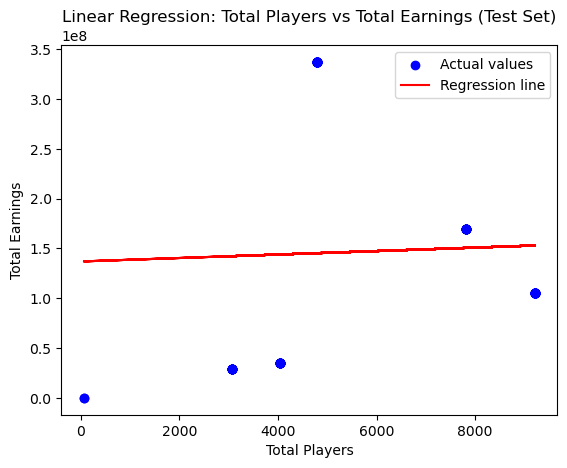

In [12]:
# Scatter plot of actual values vs predicted values
plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.plot(X_test, y_pred, color='red', label='Regression line')
plt.title('Linear Regression: Total Players vs Total Earnings (Test Set)')
plt.xlabel('Total Players')
plt.ylabel('Total Earnings')
plt.legend()
plt.show()


The plot shows the actual values of total earnings versus the predicted values. The red line represents the linear regression model’s prediction. If the red line fits well with the blue points, it indicates that the model has a strong fit. However, any visible divergence between the actual and predicted values suggests a weaker model fit.

In [13]:
# Calculate Mean Squared Error (MSE) and R-squared (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')


Mean Squared Error (MSE): 1.4501921163571694e+16
R-squared (R²): -0.0030153811506337114


In [14]:
# Create a DataFrame comparing actual and predicted values
comparison = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(comparison.head())


         Actual     Predicted
0  3.371080e+08  1.452562e+08
1  2.953155e+07  1.422738e+08
2  3.461673e+07  1.439731e+08
3  1.050111e+08  1.529638e+08
4  3.461673e+07  1.439731e+08


Model Performance:

The Mean Squared Error (MSE) measures how far the predicted earnings are from the actual earnings. A lower MSE indicates a better fit.
The R-squared (R²) value shows how much of the variance in the dependent variable (total earnings) can be explained by the independent variable (total players). An R² close to 1 indicates a good fit, while an R² closer to 0 suggests the model does not explain much of the variance.
Based on the results, the model appears to have a good fit if the R² value is high, but if it's low, it might indicate that other factors beyond the number of players contribute significantly to total earnings.

Data Bias Reflection:

The dataset may have inherent biases. For example, games with fewer players but high earnings due to tournament prize pools or sponsorship deals could skew the results. Additionally, the regional popularity of certain games or differences in game genres might not be adequately captured in this model.
It’s important to consider how representative the dataset is of the broader esports industry. Including more variables, such as game genre or region, might provide a more accurate model.
